In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import time

## From Biological to Artificial Neurons

#### The Perceptron

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [3]:
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int32) # Iris setosa?

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

## Implementing MLPs with Keras

#### Building an Image Classifier Using the Sequential API

##### Using Keras to load the dataset

In [4]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

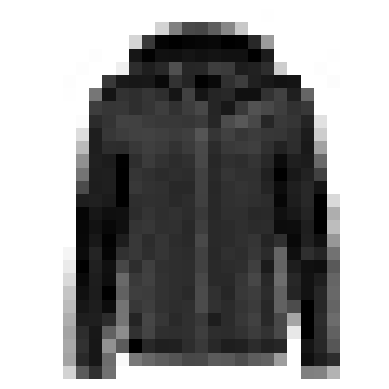

'Coat'

In [10]:
from matplotlib import pyplot as plt

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()
class_names[y_train[0]]

##### Creating the model using the Sequential API

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer("dense") is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

##### Compiling the model

In [20]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])

##### Training and evaluating the model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 2s 1ms/step - loss: 0.7169 - accuracy: 0.7659 - val_loss: 0.5241 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4895 - accuracy: 0.8293 - val_loss: 0.4370 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4429 - accuracy: 0.8445 - val_loss: 0.5312 - val_accuracy: 0.8010
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4163 - accuracy: 0.8552 - val_loss: 0.3960 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3982 - accuracy: 0.8618 - val_loss: 0.3821 - val_accuracy: 0.8702
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3803 - accuracy: 0.8661 - val_loss: 0.3795 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3683 - accuracy: 0.8705 - val_loss: 0.3670 - val_accurac

In [22]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
len(history.epoch)

30

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

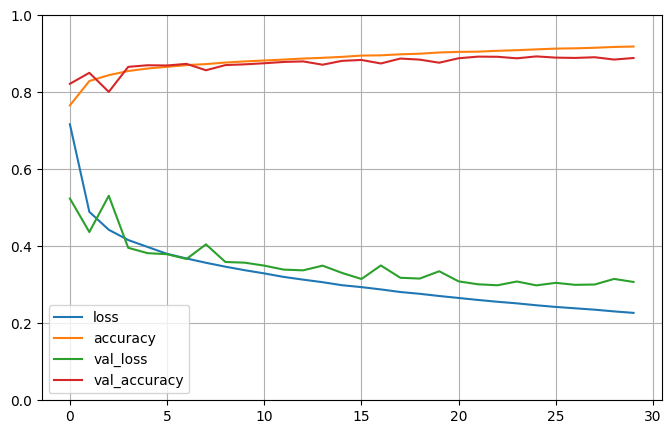

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 770us/step - loss: 0.3409 - accuracy: 0.8805


[0.34091609716415405, 0.8805000185966492]

##### Using the model to make predictions

In [27]:
X_new = X_test[:3]
y_proba = model.predict(X_new, verbose=0)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.03, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
y_pred = np.argmax(model.predict(X_new, verbose=0), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

#### Building a Regression MLP Using the Sequential API

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 996us/step - loss: 2.0518 - val_loss: 1.2730
Epoch 2/20
363/363 [==============================] - 0s 794us/step - loss: 0.8397 - val_loss: 0.7396
Epoch 3/20
363/363 [==============================] - 0s 861us/step - loss: 0.7252 - val_loss: 0.6802
Epoch 4/20
363/363 [==============================] - 0s 770us/step - loss: 0.6795 - val_loss: 0.6348
Epoch 5/20
363/363 [==============================] - 0s 835us/step - loss: 0.6444 - val_loss: 0.6042
Epoch 6/20
363/363 [==============================] - 0s 791us/step - loss: 0.6136 - val_loss: 0.5789
Epoch 7/20
363/363 [==============================] - 0s 776us/step - loss: 0.5874 - val_loss: 0.5654
Epoch 8/20
363/363 [==============================] - 0s 816us/step - loss: 0.5650 - val_loss: 0.5285
Epoch 9/20
363/363 [==============================] - 0s 862us/step - loss: 0.5439 - val_loss: 0.5117
Epoch 10/20
363/363 [==============================] - 0s 863us/step - loss: 0.525

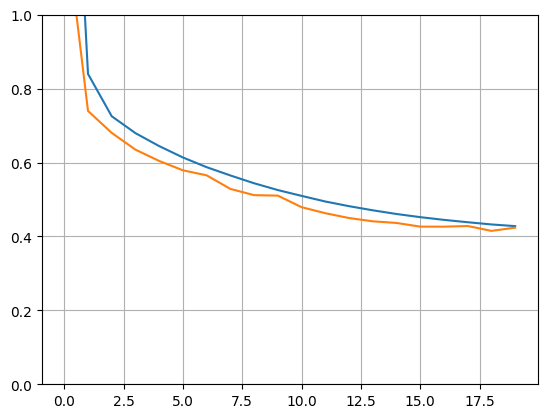

In [33]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 651us/step - loss: 0.4172


0.417237788438797

In [35]:
X_new = X_test[:3]
y_pred = model.predict(X_new, verbose=0)
y_pred

array([[0.6459989],
       [1.7055703],
       [3.1828465]], dtype=float32)

In [36]:
y_new = y_test[:3]
y_new

array([0.477  , 0.458  , 5.00001])

#### Building Complex Models Using the Functional API

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [39]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_8 (Dense)             (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   930       ['dense_8[0][0]']             
                                                                                            

In [41]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2381 - val_loss: 1.0829
Epoch 2/20
363/363 [==============================] - 0s 938us/step - loss: 0.8950 - val_loss: 0.9369
Epoch 3/20
363/363 [==============================] - 0s 905us/step - loss: 0.7360 - val_loss: 0.7632
Epoch 4/20
363/363 [==============================] - 0s 879us/step - loss: 0.6576 - val_loss: 0.6438
Epoch 5/20
363/363 [==============================] - 0s 884us/step - loss: 0.6029 - val_loss: 0.5773
Epoch 6/20
363/363 [==============================] - 0s 932us/step - loss: 0.5611 - val_loss: 0.5511
Epoch 7/20
363/363 [==============================] - 0s 959us/step - loss: 0.5287 - val_loss: 0.5340
Epoch 8/20
363/363 [==============================] - 0s 886us/step - loss: 0.5043 - val_loss: 0.4813
Epoch 9/20
363/363 [==============================] - 0s 929us/step - loss: 0.4855 - val_loss: 0.4630
Epoch 10/20
363/363 [==============================] - 0s 882us/step - loss: 0.4715 

In [42]:
model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 556us/step - loss: 0.4177


0.41772833466529846

In [43]:
y_pred = model.predict((X_new_A, X_new_B), verbose=0)
y_pred

array([[0.52209693],
       [1.9570346 ],
       [3.1206768 ]], dtype=float32)

In [44]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
          validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.4040 - main_output_loss: 2.1980 - aux_output_loss: 4.2578 - val_loss: 1.2488 - val_main_output_loss: 0.9968 - val_aux_output_loss: 3.5159
Epoch 2/20
363/363 [==============================] - 0s 955us/step - loss: 1.0008 - main_output_loss: 0.8240 - aux_output_loss: 2.5921 - val_loss: 1.0382 - val_main_output_loss: 0.7589 - val_aux_output_loss: 3.5526
Epoch 3/20
363/363 [==============================] - 0s 937us/step - loss: 0.8230 - main_output_loss: 0.6999 - aux_output_loss: 1.9311 - val_loss: 1.1083 - val_main_output_loss: 0.7825 - val_aux_output_loss: 4.0406
Epoch 4/20
363/363 [==============================] - 0s 976us/step - loss: 0.7502 - main_output_loss: 0.6494 - aux_output_loss: 1.6581 - val_loss: 1.0989 - val_main_output_loss: 0.7237 - val_aux_output_loss: 4.4755
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7060 - main_output_loss: 0.6146 - aux_output_loss: 1.5289 - va

In [45]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test]) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 588us/step - loss: 0.4913 - main_output_loss: 0.4314 - aux_output_loss: 1.0302


[0.4912743866443634, 0.4313882887363434, 1.030248999595642]

In [46]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.35793656],
        [1.8911308 ],
        [3.26673   ]], dtype=float32),
 array([[1.0389884],
        [1.7423037],
        [2.1704102]], dtype=float32))

#### Using the Subclassing API to Build Dynamic Models

In [47]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs, training=None, mask=None):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [48]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=20, 
          validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)));

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.3706 - output_1_loss: 2.2425 - output_2_loss: 3.5238 - val_loss: 1.6439 - val_output_1_loss: 1.3367 - val_output_2_loss: 4.4090
Epoch 2/20
363/363 [==============================] - 0s 921us/step - loss: 0.9904 - output_1_loss: 0.8420 - output_2_loss: 2.3264 - val_loss: 1.0049 - val_output_1_loss: 0.7618 - val_output_2_loss: 3.1926
Epoch 3/20
363/363 [==============================] - 0s 946us/step - loss: 0.7822 - output_1_loss: 0.6662 - output_2_loss: 1.8258 - val_loss: 0.7985 - val_output_1_loss: 0.6155 - val_output_2_loss: 2.4453
Epoch 4/20
363/363 [==============================] - 0s 913us/step - loss: 0.6982 - output_1_loss: 0.6038 - output_2_loss: 1.5478 - val_loss: 0.7151 - val_output_1_loss: 0.5730 - val_output_2_loss: 1.9940
Epoch 5/20
363/363 [==============================] - 0s 912us/step - loss: 0.6502 - output_1_loss: 0.5695 - output_2_loss: 1.3760 - val_loss: 0.6620 - val_output_1_loss: 0.5424 

In [49]:
model.evaluate((X_test_A, X_test_B), (y_test, y_test)) # total_loss, main_loss, aux_loss

162/162 [==============================] - 0s 603us/step - loss: 0.4624 - output_1_loss: 0.4241 - output_2_loss: 0.8074


[0.462417334318161, 0.4240851402282715, 0.8074069023132324]

In [50]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B), verbose=0)
y_pred_main, y_pred_aux

(array([[0.25463417],
        [1.9682213 ],
        [3.0876048 ]], dtype=float32),
 array([[0.92948943],
        [2.1783454 ],
        [2.5824454 ]], dtype=float32))

#### Saving and Restoring a Model

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [52]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid));

Epoch 1/10
363/363 [==============================] - 1s 977us/step - loss: 1.7876 - val_loss: 1.2119
Epoch 2/10
363/363 [==============================] - 0s 853us/step - loss: 0.7375 - val_loss: 0.6749
Epoch 3/10
363/363 [==============================] - 0s 831us/step - loss: 0.6652 - val_loss: 0.6116
Epoch 4/10
363/363 [==============================] - 0s 845us/step - loss: 0.6141 - val_loss: 0.6157
Epoch 5/10
363/363 [==============================] - 0s 830us/step - loss: 0.5736 - val_loss: 0.5358
Epoch 6/10
363/363 [==============================] - 0s 882us/step - loss: 0.5377 - val_loss: 0.5218
Epoch 7/10
363/363 [==============================] - 0s 831us/step - loss: 0.5096 - val_loss: 0.4748
Epoch 8/10
363/363 [==============================] - 0s 895us/step - loss: 0.4862 - val_loss: 0.4573
Epoch 9/10
363/363 [==============================] - 0s 814us/step - loss: 0.4677 - val_loss: 0.4437
Epoch 10/10
363/363 [==============================] - 0s 847us/step - loss: 0.453

In [53]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 572us/step - loss: 0.4426


0.4425773620605469

In [54]:
model.predict(X_new)

1/1 [==============================] - 0s 55ms/step


array([[0.69966906],
       [1.4744551 ],
       [3.2366562 ]], dtype=float32)

In [55]:
model.save("temp_model.keras")
model = keras.models.load_model("temp_model.keras")

In [56]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 544us/step - loss: 0.4426


0.4425773620605469

In [57]:
model.predict(X_new)

1/1 [==============================] - 0s 35ms/step


array([[0.69966906],
       [1.4744551 ],
       [3.2366562 ]], dtype=float32)

#### Using Callbacks

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [59]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("temp_model.keras", save_best_only=True)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb]);

Epoch 1/10
363/363 [==============================] - 1s 998us/step - loss: 2.5315 - val_loss: 2.8110
Epoch 2/10
363/363 [==============================] - 0s 882us/step - loss: 0.8989 - val_loss: 1.1251
Epoch 3/10
363/363 [==============================] - 0s 854us/step - loss: 0.6637 - val_loss: 0.6180
Epoch 4/10
363/363 [==============================] - 0s 839us/step - loss: 0.5967 - val_loss: 0.5594
Epoch 5/10
363/363 [==============================] - 0s 867us/step - loss: 0.5589 - val_loss: 0.5286
Epoch 6/10
363/363 [==============================] - 0s 864us/step - loss: 0.5280 - val_loss: 0.5042
Epoch 7/10
363/363 [==============================] - 0s 871us/step - loss: 0.5031 - val_loss: 0.4857
Epoch 8/10
363/363 [==============================] - 0s 956us/step - loss: 0.4823 - val_loss: 0.4583
Epoch 9/10
363/363 [==============================] - 0s 896us/step - loss: 0.4655 - val_loss: 0.4386
Epoch 10/10
363/363 [==============================] - 0s 839us/step - loss: 0.452

In [60]:
model = keras.models.load_model("temp_model.keras") # rollback to best model

In [61]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 584us/step - loss: 0.4249


0.42491307854652405

In [62]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, early_stopping_cb]);

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4417 - val_loss: 0.4163
Epoch 2/100
363/363 [==============================] - 0s 860us/step - loss: 0.4334 - val_loss: 0.4154
Epoch 3/100
363/363 [==============================] - 0s 884us/step - loss: 0.4266 - val_loss: 0.4105
Epoch 4/100
363/363 [==============================] - 0s 838us/step - loss: 0.4207 - val_loss: 0.4197
Epoch 5/100
363/363 [==============================] - 0s 842us/step - loss: 0.4160 - val_loss: 0.4140
Epoch 6/100
363/363 [==============================] - 0s 856us/step - loss: 0.4117 - val_loss: 0.4237
Epoch 7/100
363/363 [==============================] - 0s 862us/step - loss: 0.4081 - val_loss: 0.4202
Epoch 8/100
363/363 [==============================] - 0s 838us/step - loss: 0.4048 - val_loss: 0.4183
Epoch 9/100
363/363 [==============================] - 0s 857us/step - loss: 0.4017 - val_loss: 0.4251
Epoch 10/100
363/363 [==============================] - 0s 863us/step - los

In [63]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 645us/step - loss: 0.4105


0.41045042872428894

In [64]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("val/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
val_train_ratio_cb = PrintValTrainRatioCallback()

In [65]:
model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid), 
          callbacks=[val_train_ratio_cb], verbose=2);

Epoch 1/3
val/train: 0.98
363/363 - 0s - loss: 0.4208 - val_loss: 0.4122 - 291ms/epoch - 803us/step
Epoch 2/3
val/train: 1.02
363/363 - 0s - loss: 0.4160 - val_loss: 0.4225 - 275ms/epoch - 757us/step
Epoch 3/3
val/train: 1.02
363/363 - 0s - loss: 0.4119 - val_loss: 0.4199 - 281ms/epoch - 775us/step


#### Using TensorBoard for Visualization

In [66]:
def get_run_logdir():
    root_logdir = os.path.join(os.curdir, "logs")
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\logs\\run_2024_03_10-06_22_03'

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [68]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, tensorboard_cb]);

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 2.0831 - val_loss: 1.4078
Epoch 2/30
363/363 [==============================] - 0s 930us/step - loss: 0.7734 - val_loss: 0.6492
Epoch 3/30
363/363 [==============================] - 0s 928us/step - loss: 0.6442 - val_loss: 0.5765
Epoch 4/30
363/363 [==============================] - 0s 952us/step - loss: 0.5864 - val_loss: 0.5903
Epoch 5/30
363/363 [==============================] - 0s 954us/step - loss: 0.5480 - val_loss: 0.4942
Epoch 6/30
363/363 [==============================] - 0s 965us/step - loss: 0.5184 - val_loss: 0.4809
Epoch 7/30
363/363 [==============================] - 0s 924us/step - loss: 0.4986 - val_loss: 0.4469
Epoch 8/30
363/363 [==============================] - 0s 918us/step - loss: 0.4824 - val_loss: 0.4361
Epoch 9/30
363/363 [==============================] - 0s 913us/step - loss: 0.4698 - val_loss: 0.4447
Epoch 10/30
363/363 [==============================] - 0s 912us/step - loss: 0.4599 

In [69]:
%load_ext tensorboard
%tensorboard --logdir=./logs --host localhost

In [70]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\logs\\run_2024_03_10-06_22_19'

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [72]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, tensorboard_cb]);

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5577 - val_loss: 0.5257
Epoch 2/30
363/363 [==============================] - 0s 977us/step - loss: 0.3879 - val_loss: 2.5808
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4006 - val_loss: 1.5866
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5084 - val_loss: 6.4378
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4131 - val_loss: 61.3133
Epoch 6/30
363/363 [==============================] - 0s 943us/step - loss: 194533130019456650575872.0000 - val_loss: 865019.9375
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 12548.5713 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 967us/step - loss: 1.3433 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 924us/step - loss: 1.3435 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 1

## Fine-Tuning Neural Network Hyperparameters